In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns



In [107]:
df = pd.read_csv('Global YouTube Statistics.csv', encoding="ISO-8859-1")
df

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,IN,Music,...,2000000.0,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,US,Games,...,NaN,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,US,Entertainment,...,8000000.0,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,US,Education,...,1000000.0,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,IN,Entertainment,...,1000000.0,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,BR,Entertainment,...,700000.0,2017.0,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,IN,Games,...,300000.0,2018.0,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
992,993,Panda,12300000,2.214684e+09,NaN,HybridPanda,2452,United Kingdom,GB,Games,...,1000.0,2006.0,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,SE,Games,...,100000.0,2012.0,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501


Data preprocessing is a critical step in analyzing our dataset as it helps ensure subsequent analyses' accuracy and reliability. We outline the various preprocessing methods employed to enhance the quality and usability of the dataset. These methods include removing unnecessary features, handling missing values, addressing outliers, encoding categorical variables, and performing feature engineering.
After thorough consideration and discussion, our group first conducted data cleaning to identify and remove irrelevant features. This step helps to reduce noise and increase the efficiency of subsequent analysis. Irrelevant variables include title, abbreviation, rank, created_month, etc. To simplify the analysis, we calculated the average annual revenue as an indicator and replaced various earnings-related variables with it. In addition, we have removed the rows where the earnings are 0. 
Outliers can skew statistical analyses and lead to misleading results. For example, the cluster analytics is sensitive to outliers. To ensure a robust and accurate analysis, we identified and addressed outliers. We have plotted a scatter plot comparing earnings and subscribers. To avoid the influence of outliers on the overall data, we have removed values with “subscribers” greater than 10^6. Also, we have only kept values of “average yearly earnings” between around 9*10^3 and 9*10^8. Figure 4.1 shows the relationship between average yearly earnings and subscribers, before and after outlier processing.
In addition, we found some channels that have extremely high views but only very low earnings, such as some singers. After checking the information, we found that their main income is not from the YouTube platform, but from other companies or individual channels. Therefore, we calculated the ratio of views to earnings, thus removing some channels with extreme cases (Figure 4.2).
Categorical variables, such as 'category' and 'country', were encoded numerically using either one-hot or label encoding methods, to enable their inclusion in statistical analyses.

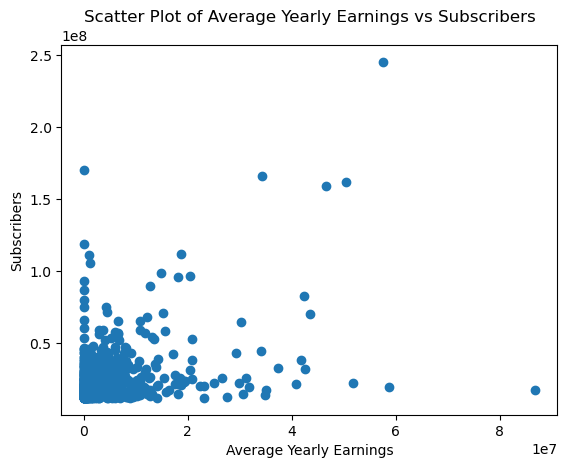

In [108]:
df['average_yearly_earnings'] = (df['highest_yearly_earnings'] + df['lowest_yearly_earnings'])/2

# 查看average_yearly_earnings和subscribers的散点图
plt.scatter(df['average_yearly_earnings'], df['subscribers'])
plt.xlabel('Average Yearly Earnings')
plt.ylabel('Subscribers')
plt.title('Scatter Plot of Average Yearly Earnings vs Subscribers')
plt.show()

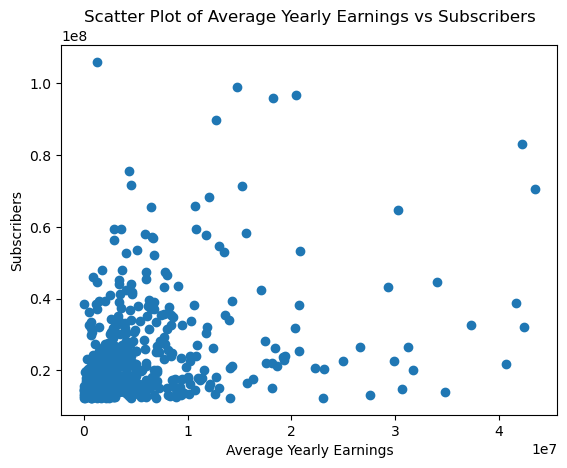

In [109]:
# 删除离群
df1 = df[df['average_yearly_earnings'] < 5 * 10**7]
df1 = df1[df1['subscribers'] < 1.5 * 10**8]
df1 = df1[df1['average_yearly_earnings'] > 1000]
df1 = df1[df1['uploads'] > 0]
df1.dropna(subset=['Country'], inplace=True)
df1.dropna(subset=['subscribers_for_last_30_days'], inplace=True)
df1.dropna(subset=['average_yearly_earnings'], inplace=True)

plt.scatter(df1['average_yearly_earnings'], df1['subscribers'])
plt.xlabel('Average Yearly Earnings')
plt.ylabel('Subscribers')
plt.title('Scatter Plot of Average Yearly Earnings vs Subscribers')
plt.show()

In [110]:
df1['average_yearly_earnings']

8       1223400.0
9      14800000.0
10     20500000.0
11     18200000.0
13     12700000.0
          ...    
990    14100000.0
991     1647100.0
992        1700.5
993       98700.0
994      636000.0
Name: average_yearly_earnings, Length: 550, dtype: float64

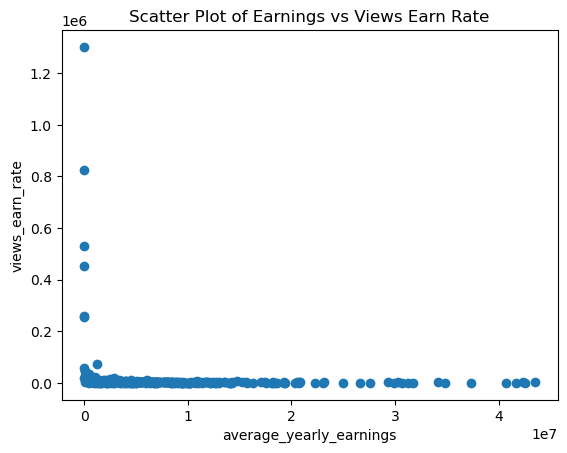

In [111]:
df1["views_earn_rate"] = df1['video views']/df1['average_yearly_earnings']
df1["views_earn_rate"]

plt.scatter(df1['average_yearly_earnings'], df1['views_earn_rate'])
plt.xlabel('average_yearly_earnings')
plt.ylabel('views_earn_rate')
plt.title('Scatter Plot of Earnings vs Views Earn Rate')
plt.show()

In [112]:
df1[df1["views_earn_rate"]>3*1e4]

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,views_earn_rate
8,9,Like Nastya,106000000,9.047906e+10,People & Blogs,Like Nastya Vlog,493,Russia,RU,People,...,Jan,14.0,81.9,1.443735e+08,4.59,107683889.0,61.524010,105.318756,1223400.0,7.395705e+04
85,86,shfa,38400000,2.152812e+10,People & Blogs,ýýýýýýýýýý ýýýýýý,982,Saudi Arabia,SA,Games,...,May,24.0,68.0,3.426853e+07,5.93,28807838.0,23.885942,45.079162,40550.0,5.309030e+05
131,132,Eros Now Music,32700000,1.785380e+10,Entertainment,Mzaalo,1521,India,IN,Entertainment,...,Mar,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,516700.0,3.455351e+04
407,408,Crafty Panda,19800000,5.759442e+09,People & Blogs,Crafty Panda,760,United States,US,Entertainment,...,Dec,3.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,156500.0,3.680155e+04
484,485,David Dobrik,17900000,7.176572e+09,People & Blogs,David Dobrik,536,United States,US,People,...,Dec,19.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,220600.0,3.253206e+04
619,620,MY FAMILY,15700000,6.153496e+09,NaN,My Family,150,Singapore,SG,People,...,Dec,3.0,84.8,5.703569e+06,4.11,5703569.0,1.352083,103.819836,23950.0,2.569309e+05
716,717,Canal Nostalgia,14700000,1.506796e+09,Entertainment,Canal Nostalgia TV,554,Spain,ES,Entertainment,...,Feb,19.0,88.9,4.707678e+07,13.96,37927409.0,40.463667,-3.749220,5789.5,2.602636e+05
759,760,Coke Studio,14400000,4.035739e+09,Music,Rohail Hyatt,450,United States,US,Music,...,Jun,4.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,90700.0,4.449547e+04
768,769,Super Polina,14300000,4.776507e+09,People & Blogs,Super Polina,576,United States,US,Entertainment,...,Jul,8.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,10550.0,4.527495e+05
848,849,Wengie,13500000,1.900273e+09,Howto & Style,Wengie,462,United States,US,Howto,...,Sep,9.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,34050.0,5.580831e+04


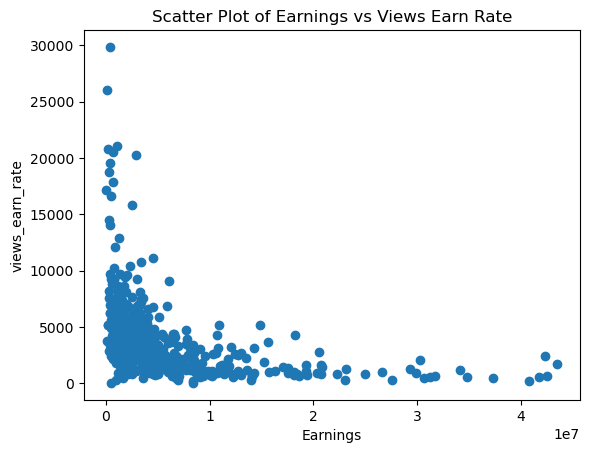

In [113]:
df1 = df1[df1["views_earn_rate"]<3*1e4]
plt.scatter(df1['average_yearly_earnings'], df1['views_earn_rate'])
plt.xlabel('Earnings')
plt.ylabel('views_earn_rate')
plt.title('Scatter Plot of Earnings vs Views Earn Rate')
plt.show()

In [114]:
df1.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,views_earn_rate
count,537.000000,5.370000e+02,5.370000e+02,537.000000,537.000000,537.000000,537.000000,5.370000e+02,537.000000,5.370000e+02,...,537.000000,537.000000,537.000000,5.370000e+02,537.000000,5.370000e+02,537.000000,537.000000,5.370000e+02,537.000000
mean,469.530726,2.329646e+07,1.209776e+10,14784.515829,2096.256983,57.459963,62.381750,2.134485e+08,53364.068901,8.531924e+05,...,2012.778399,15.234637,60.089013,5.039674e+08,8.888324,2.434258e+08,25.955345,-5.453916,5.442826e+06,3778.064314
std,288.969559,1.338707e+07,1.152772e+10,44530.313378,15156.614427,52.840816,50.546948,2.695966e+08,67403.545523,1.077770e+06,...,4.541810,8.869749,26.405773,5.190667e+08,4.842469,1.636545e+08,19.878869,84.711996,6.874407e+06,3481.099721
min,10.000000,1.230000e+07,2.056338e+07,15.000000,4.000000,1.000000,1.000000,1.370000e+06,342.000000,5.500000e+03,...,1970.000000,1.000000,9.000000,2.870250e+05,0.750000,8.943100e+04,-38.416097,-106.346771,3.490000e+04,39.292827
25%,215.000000,1.470000e+07,4.924054e+09,498.000000,213.000000,10.000000,18.000000,5.621800e+07,14100.000000,2.249000e+05,...,2010.000000,8.000000,28.100000,1.081166e+08,5.360000,6.432484e+07,20.593684,-95.712891,1.434350e+06,1632.275286
50%,454.000000,1.860000e+07,9.052368e+09,1299.000000,530.000000,38.000000,45.000000,1.229260e+08,30700.000000,4.917000e+05,...,2013.000000,15.000000,60.000000,3.282395e+08,5.560000,2.706630e+08,26.820553,-3.435973,3.134400e+06,2906.932824
75%,719.000000,2.620000e+07,1.527867e+10,4175.000000,1399.000000,101.000000,104.000000,2.509950e+08,62700.000000,1.000000e+06,...,2016.000000,23.000000,88.200000,1.366418e+09,14.700000,4.710315e+08,37.090240,78.962880,6.376500e+06,4711.802860
max,995.000000,9.890000e+07,1.010000e+11,301308.000000,342460.000000,176.000000,172.000000,1.707000e+09,426800.000000,6.800000e+06,...,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.524010,138.252924,4.350000e+07,29860.976082


In [115]:
#初步筛掉的特征（用于proposal），此段可删
feature_drop = ["video_views_rank", "Abbreviation","lowest_monthly_earnings", 
                "highest_monthly_earnings", "lowest_yearly_earnings", "highest_yearly_earnings","Title",
                "channel_type", "created_date", "created_month"
                ]
df1.drop(feature_drop, axis=1, inplace=True)
df1

,rank,Youtuber,subscribers,video views,category,uploads,Country,country_rank,channel_type_rank,video_views_for_the_last_30_days,subscribers_for_last_30_days,created_year,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,average_yearly_earnings,views_earn_rate
9,10,Vlad and Niki,98900000,7.718017e+10,Entertainment,574,United States,5.0,6.0,5.805740e+08,600000.0,2018.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,14800000.0,5214.876344
10,11,Zee Music Company,96700000,5.785629e+10,Music,8548,India,3.0,2.0,8.036130e+08,1100000.0,2014.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,20500000.0,2822.258019
11,12,WWE,96000000,7.742847e+10,Sports,70127,United States,6.0,1.0,7.146140e+08,600000.0,2007.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,18200000.0,4254.311740
13,14,BLACKPINK,89800000,3.214460e+10,People & Blogs,543,South Korea,1.0,3.0,4.989300e+08,700000.0,2016.0,94.3,5.170910e+07,4.15,42106719.0,35.907757,127.766922,12700000.0,2531.070674
15,16,Sony SAB,83000000,1.010000e+11,Shows,71270,India,5.0,7.0,1.657000e+09,1100000.0,2007.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,42300000.0,2387.706856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,Music,99,United States,175.0,171.0,4.941200e+07,100000.0,2012.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,1274100.0,5488.899034
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,1200,Brazil,55.0,172.0,5.525130e+08,700000.0,2017.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,14100000.0,640.397855
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,1500,India,125.0,69.0,6.473500e+07,300000.0,2018.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,1647100.0,1016.580624
993,994,RobTopGames,12300000,3.741235e+08,Gaming,39,Sweden,4.0,69.0,3.871000e+06,100000.0,2012.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,98700.0,3790.511479


In [116]:
# 决定应用的特征
feature_1 = ["subscribers", "video views", "category", "Unemployment rate", "Population", "video_views_for_the_last_30_days", "average_yearly_earnings"]
earnings_distribution = df1['average_yearly_earnings'].value_counts()

In [117]:
# 创建"existed_time"列
df1['existed_time'] = 2023 - df1['created_year']

# 创建"upload_frequency"列
df1['upload_frequency'] = (df1['uploads'] / df1['existed_time'])
# df1['average_yearly_earnings'] = np.log(df1['average_yearly_earnings'])


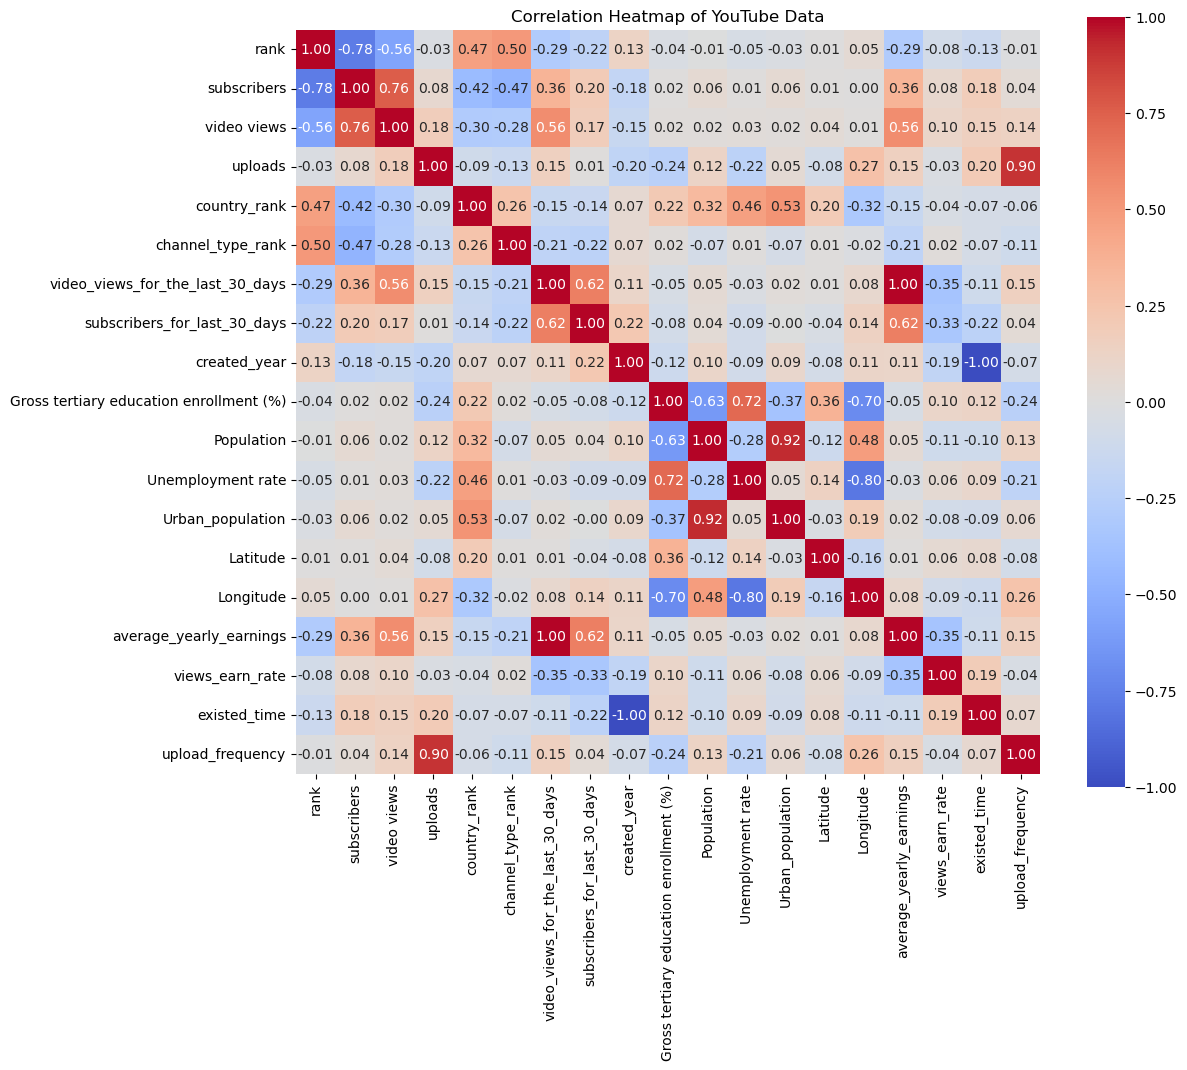

In [118]:
#相关性热力图

import matplotlib.pyplot as plt
import seaborn as sns

# Selecting numerical columns
numerical_columns = df1.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_columns.corr()

# Set up the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Title
plt.title('Correlation Heatmap of YouTube Data')
plt.savefig('相关性热力图.png', format='png')


In [119]:
# 计算所有组合类型的数量
counts = df.groupby(['Country', 'category']).size().reset_index(name='Count')

print(counts)

           Country        category  Count
0      Afghanistan           Music      1
1          Andorra   Howto & Style      1
2        Argentina          Comedy      3
3        Argentina       Education      1
4        Argentina   Entertainment      3
..             ...             ...    ...
174  United States          Sports      5
175      Venezuela  People & Blogs      1
176        Vietnam          Comedy      1
177        Vietnam   Entertainment      1
178        Vietnam           Music      1

[179 rows x 3 columns]


In [120]:
# 使用Pandas的get_dummies函数进行One-Hot Encoding
df1 = pd.get_dummies(df1, columns=['category'])
df1 = pd.get_dummies(df1, columns=['Country'])
df1

,rank,Youtuber,subscribers,video views,uploads,country_rank,channel_type_rank,video_views_for_the_last_30_days,subscribers_for_last_30_days,created_year,...,Country_Spain,Country_Sweden,Country_Switzerland,Country_Thailand,Country_Turkey,Country_Ukraine,Country_United Arab Emirates,Country_United Kingdom,Country_United States,Country_Vietnam
9,10,Vlad and Niki,98900000,7.718017e+10,574,5.0,6.0,5.805740e+08,600000.0,2018.0,...,0,0,0,0,0,0,0,0,1,0
10,11,Zee Music Company,96700000,5.785629e+10,8548,3.0,2.0,8.036130e+08,1100000.0,2014.0,...,0,0,0,0,0,0,0,0,0,0
11,12,WWE,96000000,7.742847e+10,70127,6.0,1.0,7.146140e+08,600000.0,2007.0,...,0,0,0,0,0,0,0,0,1,0
13,14,BLACKPINK,89800000,3.214460e+10,543,1.0,3.0,4.989300e+08,700000.0,2016.0,...,0,0,0,0,0,0,0,0,0,0
15,16,Sony SAB,83000000,1.010000e+11,71270,5.0,7.0,1.657000e+09,1100000.0,2007.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,990,Migos ATL,12400000,6.993406e+09,99,175.0,171.0,4.941200e+07,100000.0,2012.0,...,0,0,0,0,0,0,0,0,1,0
990,991,Natan por Aï¿,12300000,9.029610e+09,1200,55.0,172.0,5.525130e+08,700000.0,2017.0,...,0,0,0,0,0,0,0,0,0,0
991,992,Free Fire India Official,12300000,1.674410e+09,1500,125.0,69.0,6.473500e+07,300000.0,2018.0,...,0,0,0,0,0,0,0,0,0,0
993,994,RobTopGames,12300000,3.741235e+08,39,4.0,69.0,3.871000e+06,100000.0,2012.0,...,0,1,0,0,0,0,0,0,0,0


In [121]:
df1.to_excel('preprocess.xlsx', index=False, encoding="UTF-8")
counts.to_excel('counts.xlsx', index=False, encoding="UTF-8")

/Users/duansuyang/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:211: FutureWarning: the 'encoding' keyword is deprecated and will be removed in a future version. Please take steps to stop the use of 'encoding'
  return func(*args, **kwargs)
